
Question We have to answer:-

Which Category is Best Selling and Most Profitable?

What are the Best Selling and Most Profitable Sub-Category?

Which is the Top Selling Sub-Category?

Which Customer Segment is Most Profitable?

Which Region is the Most Profitable?

Which City has the Highest Number of Sales?

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [126]:
df=pd.read_csv('SampleSuperstore.csv')

In [127]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [128]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [129]:
df.shape

(9994, 13)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [131]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Checking the missing values

In [132]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There is no missing values

# Finding Duplicate Data

In [133]:
df.duplicated().sum()

17

There are 17 duplicated items

In [134]:
df.drop_duplicates(inplace=True)

In [135]:
df.shape

(9977, 13)

In [136]:

df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200


# First we find the most selling and profitable product

In [137]:
df1=pd.DataFrame(df.groupby(['Category'])[['Sales','Profit','Quantity']].sum())

In [138]:
df1

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


In [139]:
# maximum sale and profit
df1.max()

Sales       836154.0330
Profit      145454.9481
Quantity     22861.0000
dtype: float64

In [140]:
import seaborn as sns

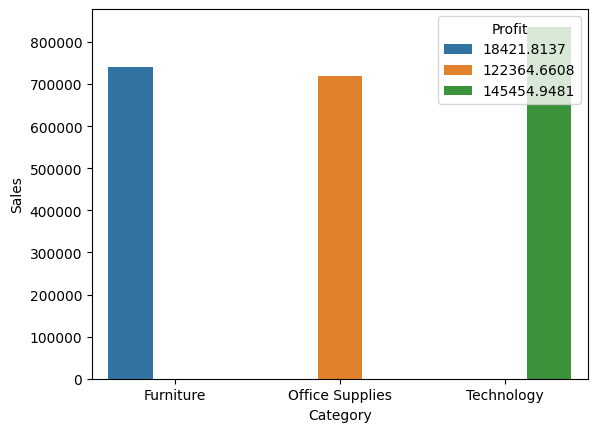

In [176]:
cat1=sns.barplot(x=df1.index,y=df1.Sales,hue=df1.Profit)

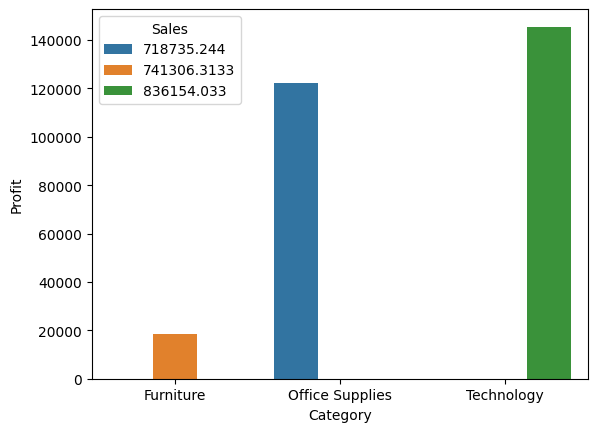

In [177]:
cat2=sns.barplot(x=df1.index,y=df1.Profit,hue=df1.Sales)

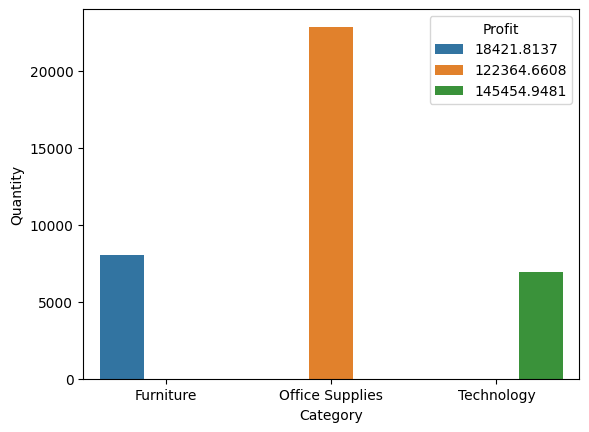

In [185]:
cat3=sns.barplot(x=df1.index,y=df1.Quantity,hue=df1.Profit)

# Observation

The category 1 shows that the furniture and office supplies were make
similar amount of sales.
The Category 2 shows that the most profitable was Technology and least profitable is Furniture.
The category 3 shows that the most sold quantity product after that furniture and then technology product are sold.


From above observation we find that the most profitable was Technology department after that
office supplies and then furniture and the most sold quantity is of office supplies 
and least sold product is of technology department.

 ## What are the best selling and most profitable sub-category

In [144]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [145]:
df2=pd.DataFrame(df.groupby(['Sub-Category'])[['Sales','Profit']].sum())

In [146]:
df2

,Sales,Profit
Sub-Category,,
Accessories,167380.3180,41936.6357
Appliances,107532.1610,18138.0054
Art,27107.0320,6524.6118
Binders,203409.1690,30228.0003
Bookcases,114879.9963,-3472.5560
Chairs,327777.7610,26567.1278
Copiers,149528.0300,55617.8249
Envelopes,16476.4020,6964.1767
Fasteners,3024.2800,949.5182


In [147]:
df2.idxmax()

Sales      Phones
Profit    Copiers
dtype: object

In [160]:
sales_df2=pd.DataFrame(df2.sort_values('Sales',ascending=False))
sales_df2

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [161]:
profit_df2=pd.DataFrame(df2.sort_values('Profit',ascending=False))
profit_df2

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


Text(0.5, 1.0, 'Most Selling SubCategory')

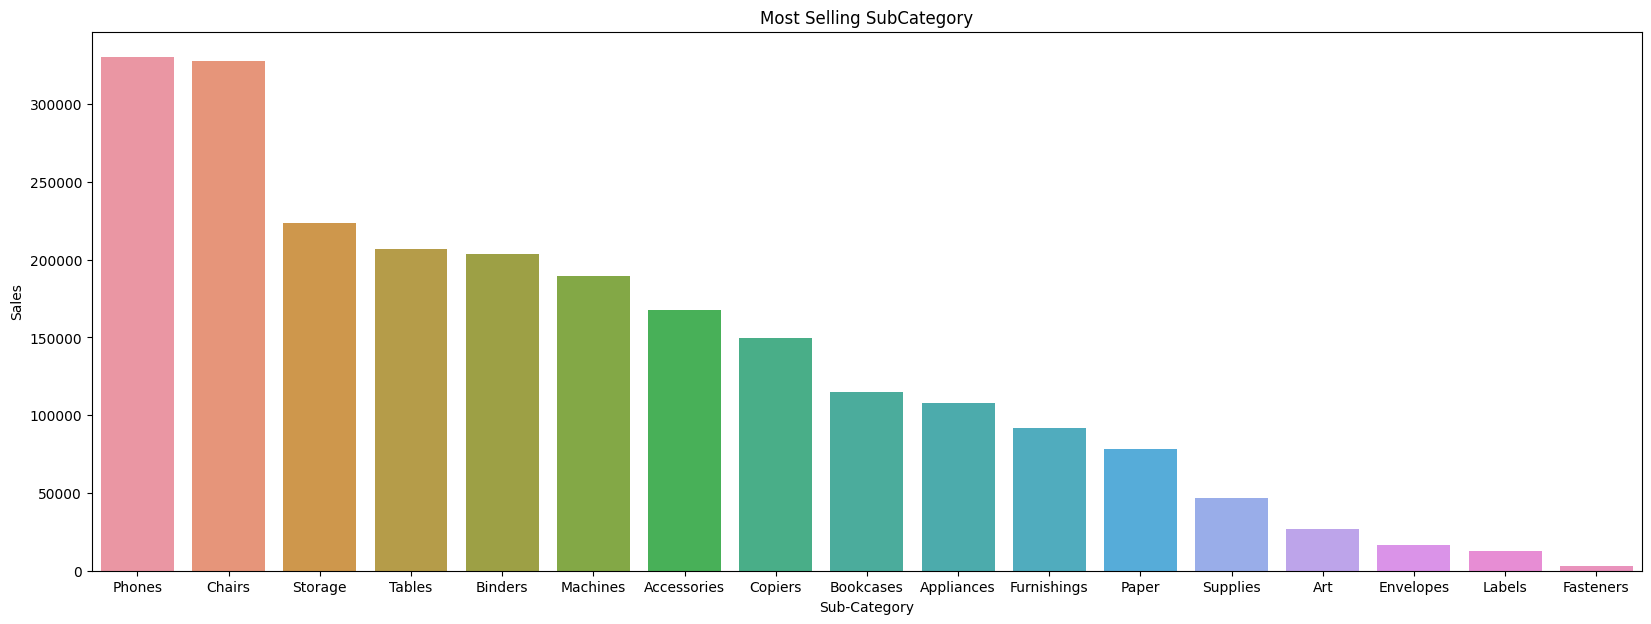

In [192]:
plt.figure(figsize=(20,7))
subcat1=sns.barplot( x= sales_df2.index , y = sales_df2.Sales)
plt.title('Most Selling SubCategory')

Text(0.5, 1.0, 'Most Profitable SubCategory')

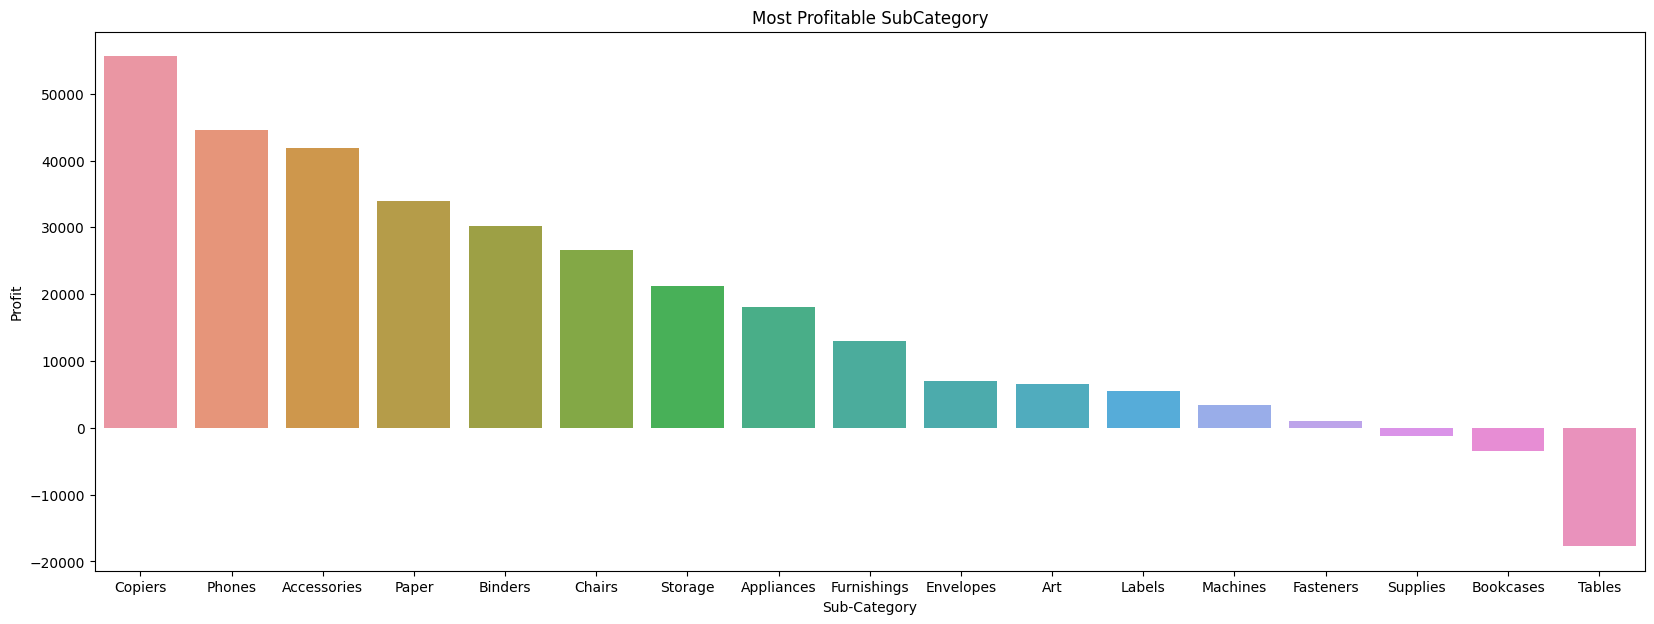

In [191]:
plt.figure(figsize=(20,7))
subcat2 = sns.barplot(x = profit_df2.index , y = profit_df2.Profit)
plt.title('Most Profitable SubCategory')

## Observation form above graph

Phone and Chairs are the top 2 Best selling subcategory.

Copiers and Phones are the most profitable subcategory.

Tables,Bookcase,Supplies,Fasteners are making loss have these are least sold subcateory.



# Which is the Top Selling Sub-Category?

In [193]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [194]:
df3 = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))

In [195]:
df3

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


In [196]:
df3.idxmax()

Quantity    Binders
dtype: object

In [203]:
df3.min()

Quantity    234
dtype: int64

Text(0.5, 1.0, 'Top Selling Sub-Category')

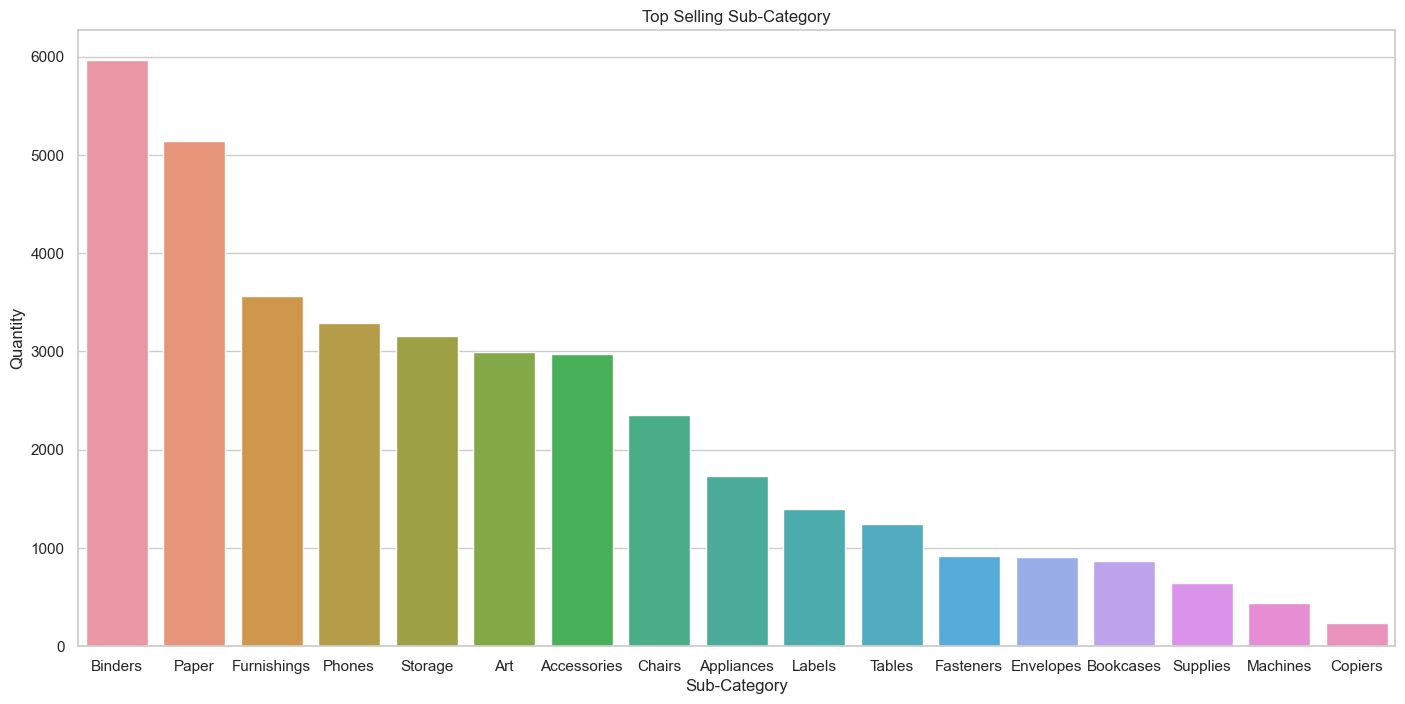

In [330]:
plt.figure(figsize=(17,8))
sns.barplot(x=df3.index,y=df3.Quantity)
plt.title('Top Selling Sub-Category')

 Blinders and Paper are the most selling category, while the copiers which is most profitable has a least selling
     only 234.

# Which customer segment is most profitable

In [204]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [205]:
df4=pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum().sort_values('Profit',ascending=False))
df4

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


In [229]:
df4.max()

Profit    134007.4413
dtype: float64

Text(0.5, 1.0, 'MostProfitable Customer Segment')

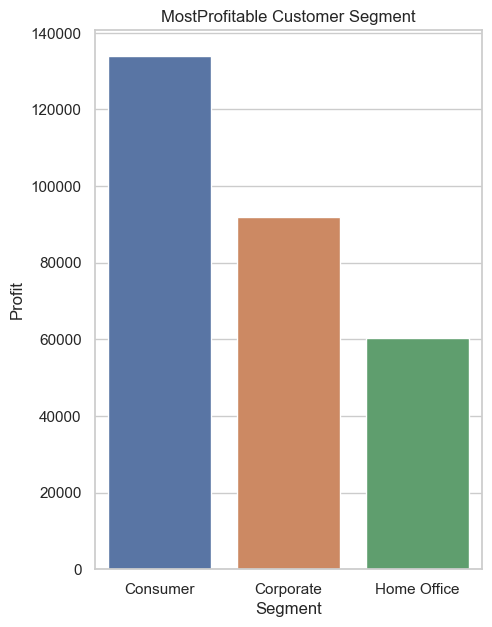

In [228]:
plt.figure(figsize=(5,7))
sns.set_theme(style='whitegrid')
sns.barplot(x = df4.index, y = df4.Profit)
plt.title('MostProfitable Customer Segment')


Consumer segment is most profitable after that 
corporate Segment and then Home Office comes.

# Which Region is the most profitable

In [276]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,NaN,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,NaN,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,NaN,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,NaN,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,NaN,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [281]:
df4 = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())

In [282]:
df4

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


In [287]:
df4.max()

Region           West
Profit    108329.8079
dtype: object

<Axes: xlabel='Region', ylabel='Profit'>

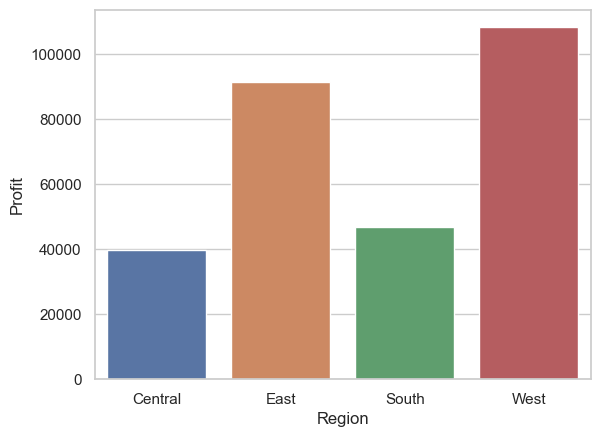

In [284]:
sns.barplot(x=df4.Region, y= df4.Profit)

Text(0.5, 1.0, 'Most Profitable By Region')

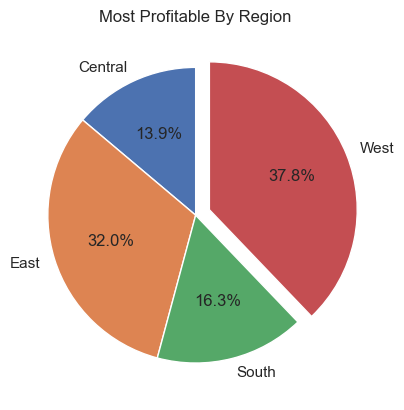

In [309]:
explode = [0,0,0,0.1]
plt.pie(df4.Profit , labels = df4.Region , explode = explode,startangle = 90,autopct = '%0.1f%%')
plt.title("Most Profitable By Region")

East And West Region are the most profitable region

# Which city has the highest number of sales

In [310]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,NaN,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,NaN,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,NaN,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,NaN,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,NaN,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [319]:
df5 = pd.DataFrame(df.groupby(['City'])[['Sales','Quantity']].sum().sort_values('Sales',ascending = False))

In [320]:
df5

,Sales,Quantity
City,,
New York City,256319.041,3413
Los Angeles,175831.901,2876
Seattle,119460.282,1578
San Francisco,112577.172,1920
Philadelphia,109061.461,1978
...,...,...
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1


In [323]:
df5.max()

Sales       256319.041
Quantity      3413.000
dtype: float64

In [324]:
df5.idxmax()

Sales       New York City
Quantity    New York City
dtype: object

In [326]:
# Top 10 City with highest sales
top10 = df5.head(10)

Text(0.5, 1.0, 'Top 10 City with highest numberof sales')

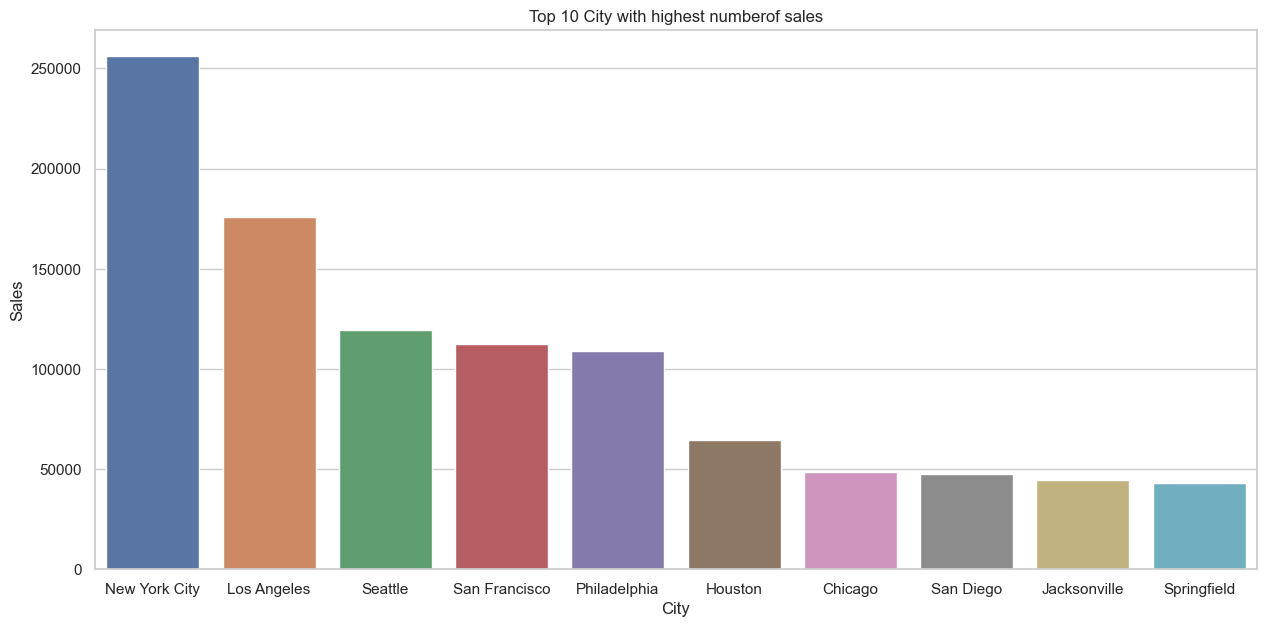

In [329]:
plt.figure(figsize=(15,7))
sns.barplot(x=top10.index , y = top10.Sales)
plt.title('Top 10 City with highest numberof sales')

# CONCLUSION

Bundle the high selling and most profitable sub-categories, such as Technology (Phones and Chairs) with the less profitable ones like Bookcases and Tables, to offset losses.

Create packages for Home Offices customers with products like tables, chairs, phones, copiers, storage, label, fasteners, and bookcases to make it easier for them to select items.

For the loss-making products, such as Supplies, Bookcases, and Tables, consider either dropping them from the catalog or finding cheaper suppliers to reduce the costs.

Target the Consumer and Corporate Segment, which make up more than 70% of the customer base, especially those in the Top 10 cities with highest sales in the East and West regions, by introducing special promotions and bundles for mass Consumer and Home Offices.